# Simulador de Daltonismo

Como converter uma imagem normal para simular um efeito de daltonismo<br>
Filipe Borba e Guilherme Graicer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

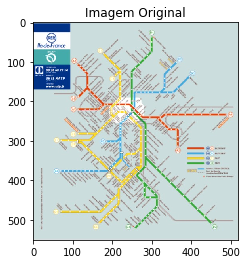

In [2]:
img = cv2.imread('metro_artigo.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Imagem Original")
plt.imshow(img)

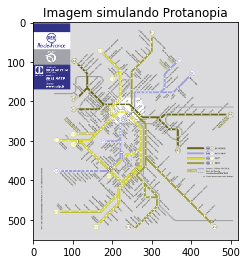

In [3]:
def protanopia(img):
    imagem = img.copy()
    
    #Passo 1
    imagem = (imagem/255)**2.2
    
    #Passo 2
    imagem = (0.992052*imagem) + 0.003974
    
    #Passo 3
    rgb_to_lms = np.array([[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]])
    h, w, d = imagem.shape
    for i in range(h):
        for j in range(w):
            imagem[i][j] = np.dot(rgb_to_lms, imagem[i][j])
    
    #Passo 4
    lms_matrix_protanopia = np.array([[0, 2.02344, -2.52581],[0, 1, 0],[0, 0, 1]])
    for i in range(h):
        for j in range(w):
            imagem[i][j] = np.dot(lms_matrix_protanopia, imagem[i][j])
    
    #Passo 5
    inverse_rgb_to_lms = np.array([[0.080944, -0.130504, 0.116721],[-0.0102485, 0.0540194, -0.113615],[-0.000365294, -0.00412163, 0.693513]])
    for i in range(h):
        for j in range(w):
            imagem[i][j] = np.dot(inverse_rgb_to_lms, imagem[i][j])
    
    #Passo 6
    imagem = 255*imagem**(1/2.2)
    imagem = np.round(imagem, 0)
    imagem = imagem.astype(int)
    plt.title("Imagem simulando Protanopia")
    plt.imshow(imagem)
    
protanopia(img)

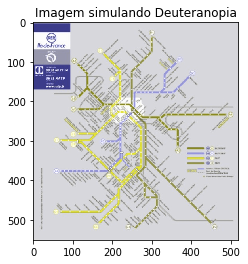

In [4]:
def deuteranopia(img):
    imagem = img.copy()
    
    #Passo 1
    imagem = (imagem/255)**2.2
    
    #Passo 2
    imagem = (0.957237*imagem) + 0.0213814
    
    #Passo 3
    rgb_to_lms = np.array([[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]])
    h, w, d = imagem.shape
    for i in range(h):
        for j in range(w):
            imagem[i][j] = np.dot(rgb_to_lms, imagem[i][j])
    
    #Passo 4
    lms_matrix_deuteranopia = np.array([[1, 0, 0],[0.494207, 0, 1.24827],[0, 0, 1]])
    for i in range(h):
        for j in range(w):
            imagem[i][j] = np.dot(lms_matrix_deuteranopia, imagem[i][j])
    
    #Passo 5
    inverse_rgb_to_lms = np.array([[0.080944, -0.130504, 0.116721],[-0.0102485, 0.0540194, -0.113615],[-0.000365294, -0.00412163, 0.693513]])
    for i in range(h):
        for j in range(w):
            imagem[i][j] = np.dot(inverse_rgb_to_lms, imagem[i][j])
    
    #Passo 6
    imagem = 255*imagem**(1/2.2)
    imagem = np.round(imagem, 0)
    imagem = imagem.astype(int)
    plt.title("Imagem simulando Deuteranopia")
    plt.imshow(imagem)
    
deuteranopia(img)

#### Como validar esses resultados? Como sabemos que esse simulador realmente representa a experiência sensorial de uma pessoa com daltonismo?
* R: Podemos validar esses resultados através das imagens do artigo, ou até mesmo colocando um "color wheel" e comparando as cores para verificar que se trata de protanopia ou deuteranopia

#### Quais as aplicações deste trabalho? Como você usaria esta técnica para melhorar o design de um produto?<br>
* R: Esse trabalho poderia ser aplicado no design de avisos ou materiais de segurança, com o objetivo de garantir que qualquer usuário poderia ler ou entender qualquer conteúdo, como por exemplo placas de piso molhado, aviso de saída de emergência, aviso de EPI do laboratório. Além disso, o simulador permitiria verificar as cores de um produto, deixando-o atraente para qualquer usuário, seja ele daltônico ou não.

# Simulador de daltonismo com "color wheel"

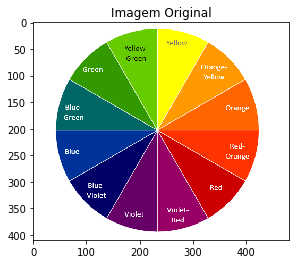

In [5]:
img_wheel = cv2.imread('color_wheel.png')
img_wheel = cv2.cvtColor(img_wheel, cv2.COLOR_BGR2RGB)
plt.title("Imagem Original")
plt.imshow(img_wheel)

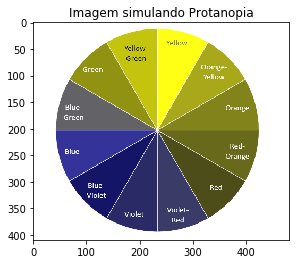

In [8]:
deuteranopia(img_wheel)

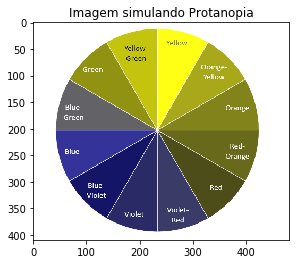

In [7]:
protanopia(img_wheel)